In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns   

plt.style.use('seaborn') 
sns.set(font_scale=2.5)  

import missingno as msno  

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [59]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [60]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [62]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [63]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot: >

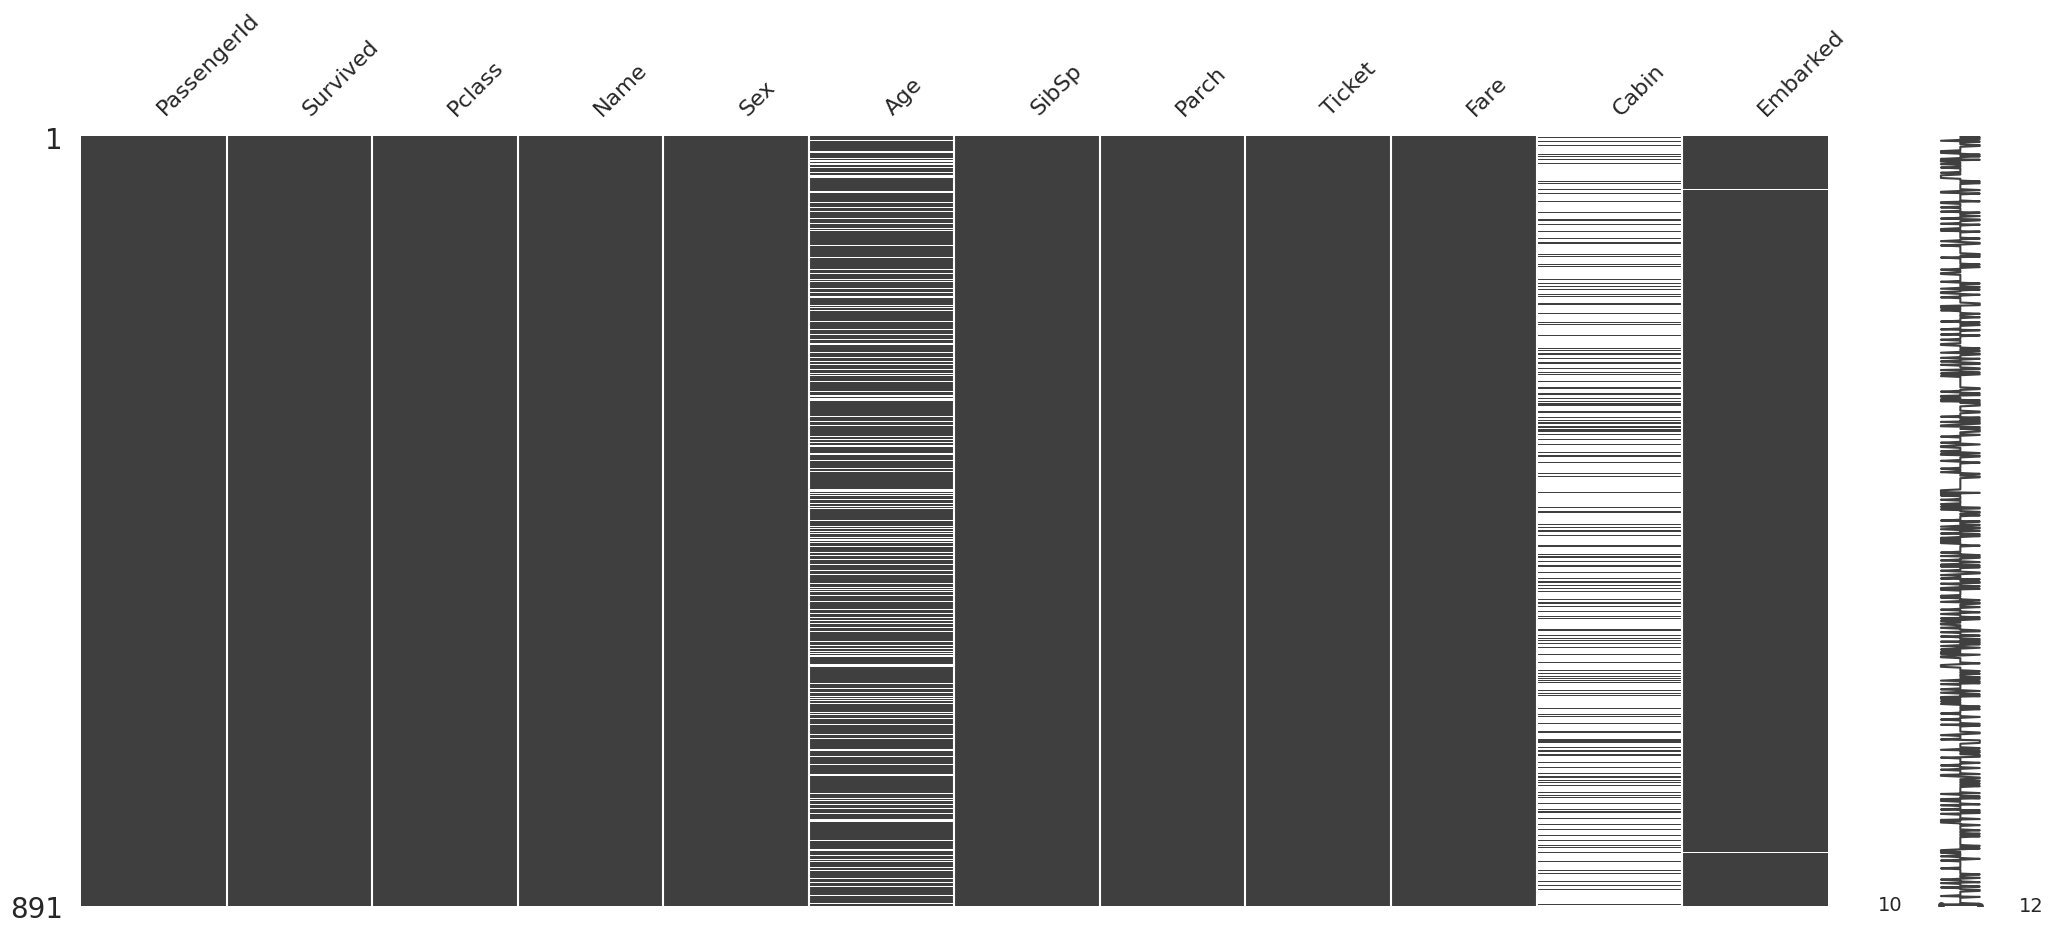

In [64]:
msno.matrix(df=train.iloc[:,:])

<AxesSubplot: >

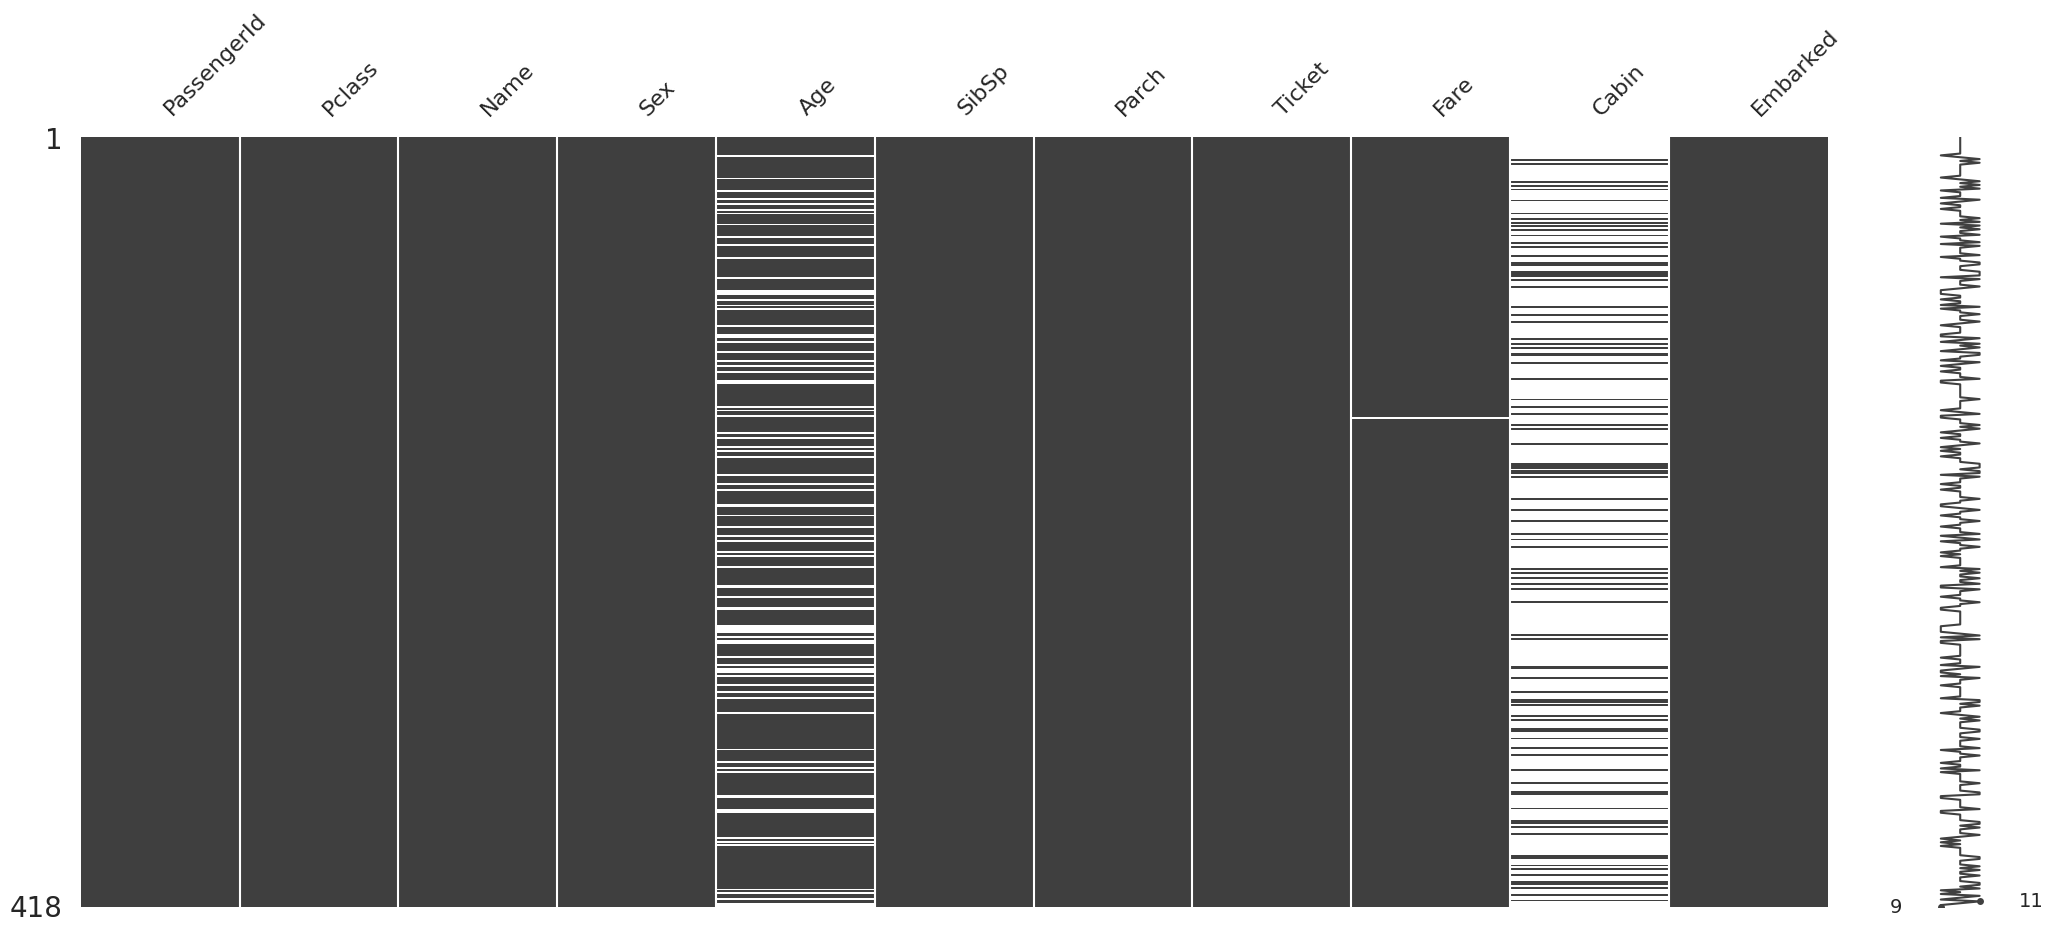

In [65]:
msno.matrix(df=test.iloc[:,:])

**사망자 - 생존자 시각화**

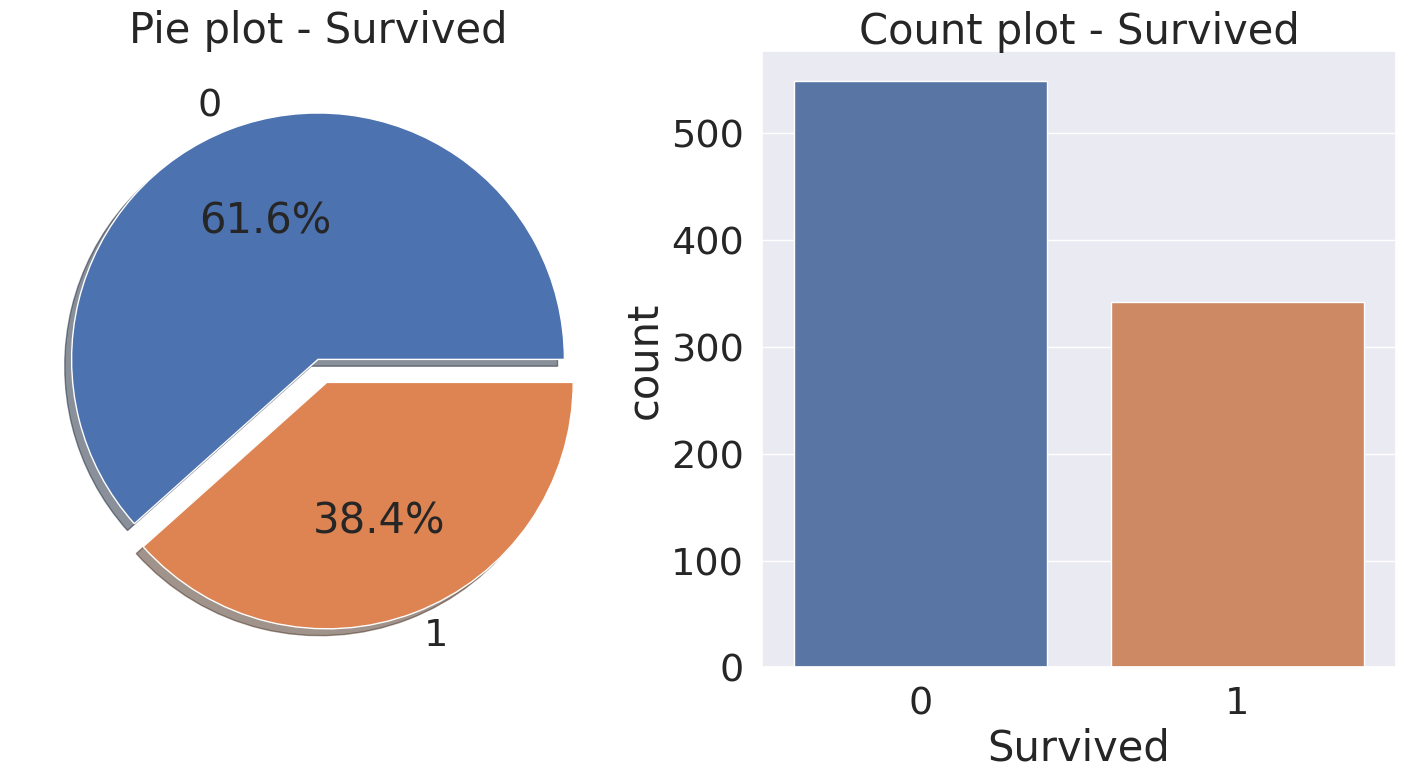

In [66]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))  #pyplot으로 그림 그릴 때 도화지 까는 과정 #1행 2열 #sub-> 하위 부분부분

train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(train, x='Survived', ax=ax[1]) 

# 김향임 : 과제에서 해결하지 못한 오류 해결함 .. ~ 파라미터 수정함

ax[1].set_title('Count plot - Survived') 
plt.show()

In [67]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [68]:
train[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [69]:
pd.crosstab(train['Pclass'], train['Survived'], margins = True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


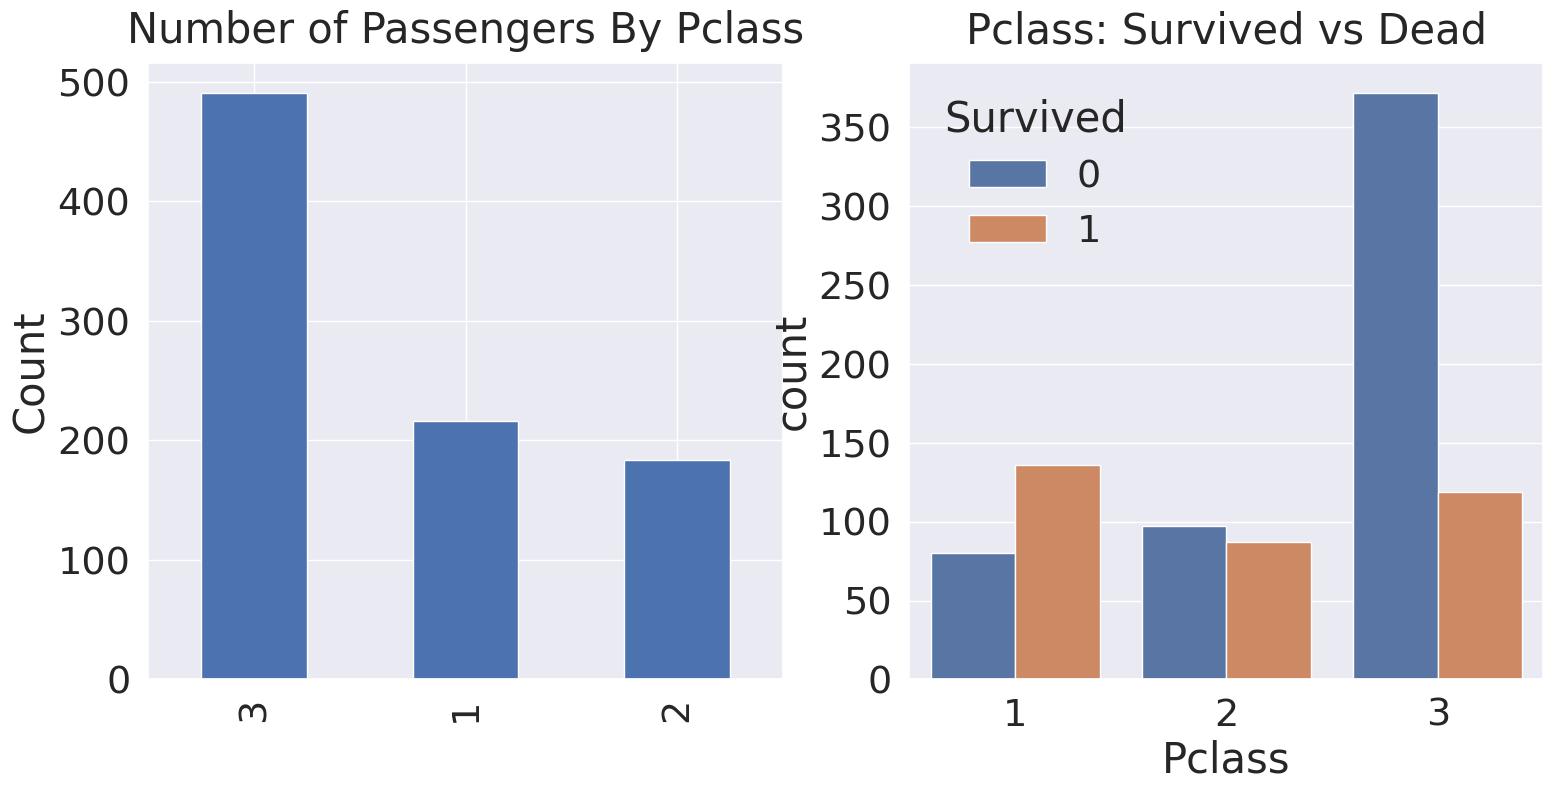

In [70]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(train, x ='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

**성별 value 분석**

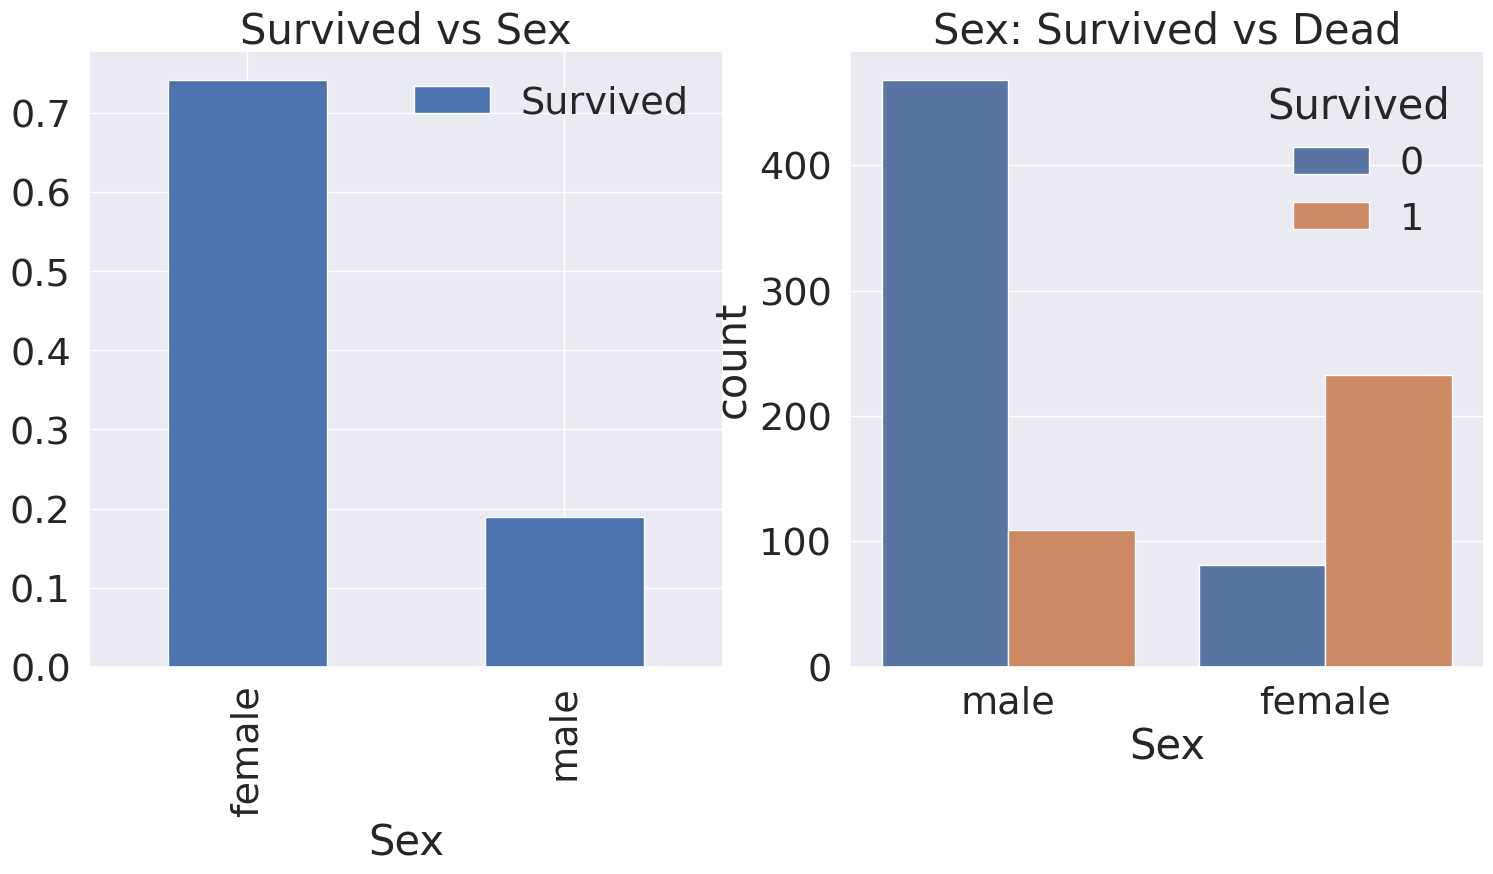

In [71]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # subplot : 그래프 2개 (여러개 작성할 때 사용)
train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot( train , x = 'Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [72]:
train[['Sex','Survived']].groupby(['Sex'],as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [73]:
pd.crosstab(train['Sex'], train['Survived'], margins = True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


**Sex & Pclass value 분석**

In [74]:
# 오류 여전히 해결 못함 .. Why 오류 ..!!!!!
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)

AttributeError: module 'seaborn' has no attribute 'factorplot'

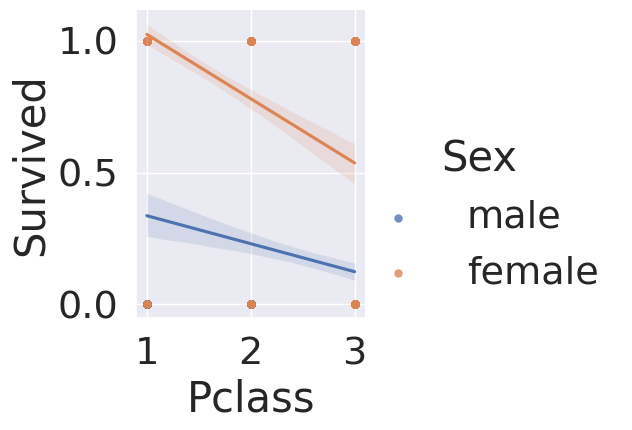

In [75]:
sns.lmplot(data = train, x ='Pclass', y = 'Survived',hue='Sex' )

In [76]:
train['Age'].max()

80.0

In [77]:
train['Age'].min()

0.42

In [78]:
train['Age'].mean()

29.69911764705882

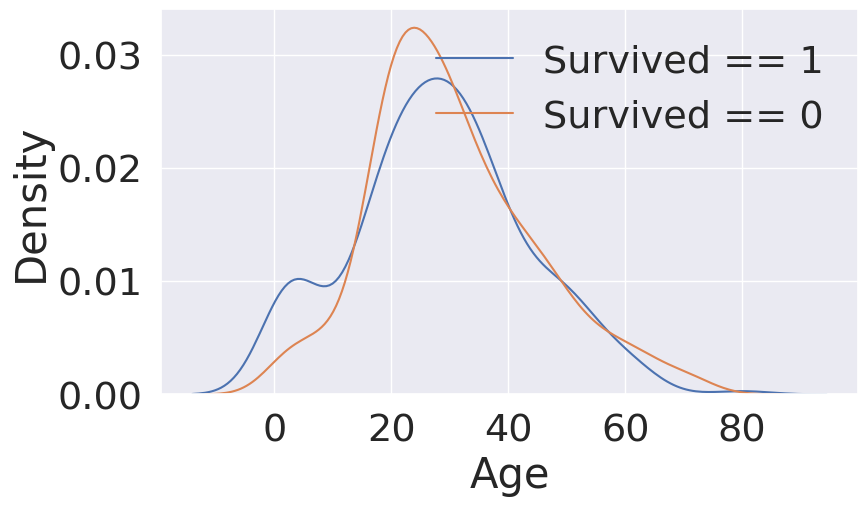

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train[train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(train[train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

# kdeplot : 커널 밀도 추정 함수

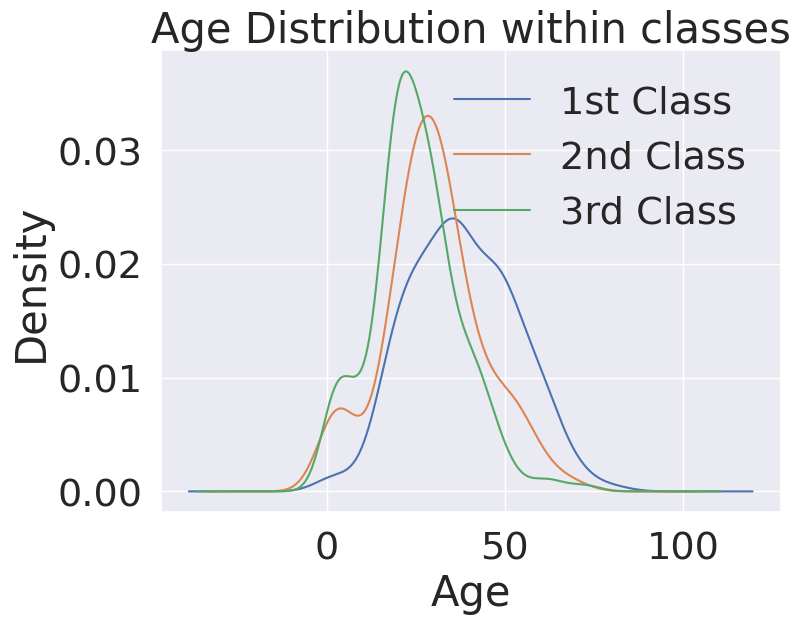

In [85]:
plt.figure(figsize=(8, 6))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

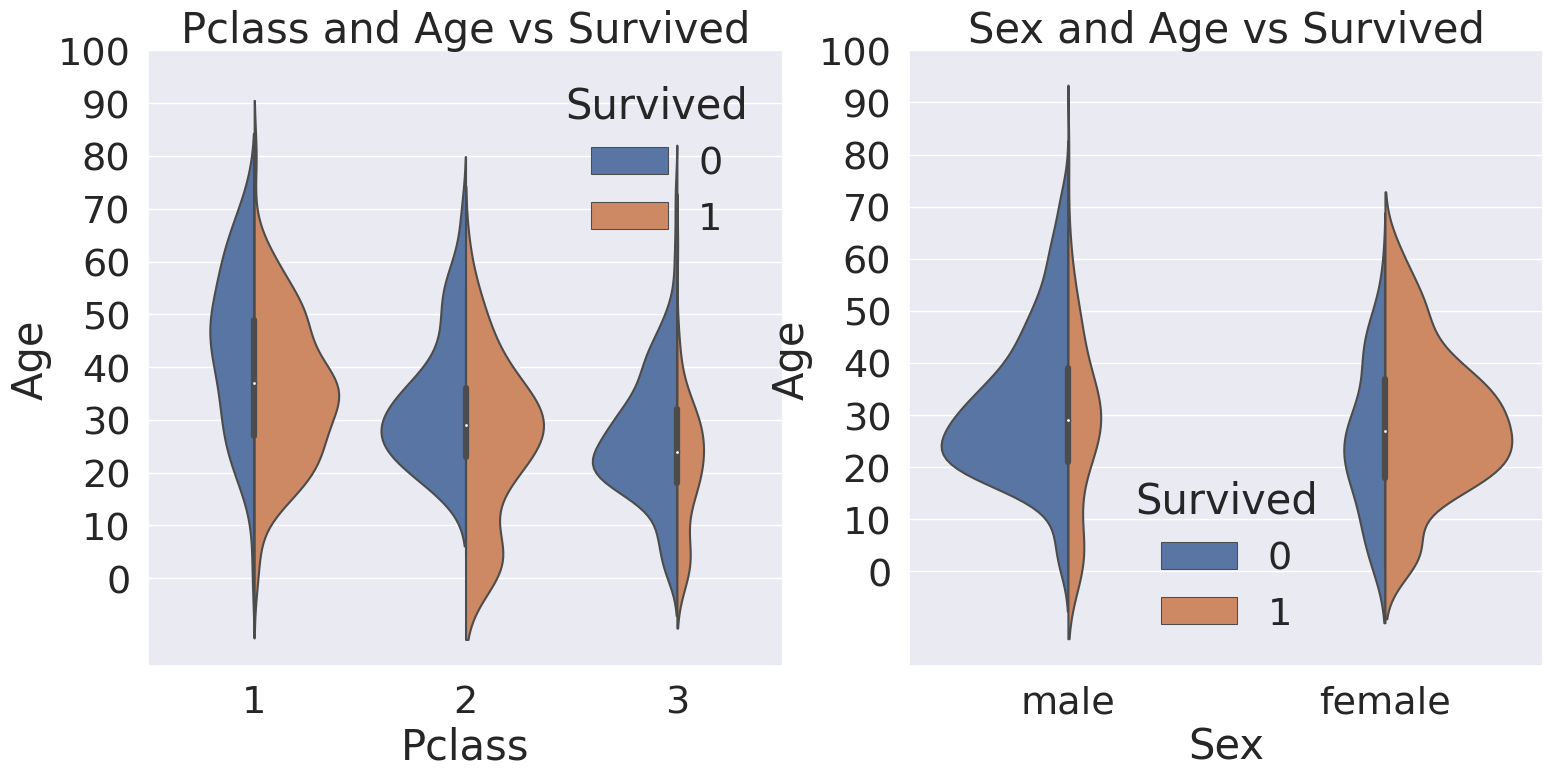

In [89]:
# violinplot 오류 해결 -> x,y 넣어줘야 하는 거 였음 .. . .  
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Embarked(탑승 항구), Fare(탑승 요금) 데이터는 생존률에 큰 영향을 미치지 않을 거라 판단

가족 관계
====

In [91]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [92]:
print("Maximum size of Family: ", train['FamilySize'].max())
print("Minimum size of Family: ", train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


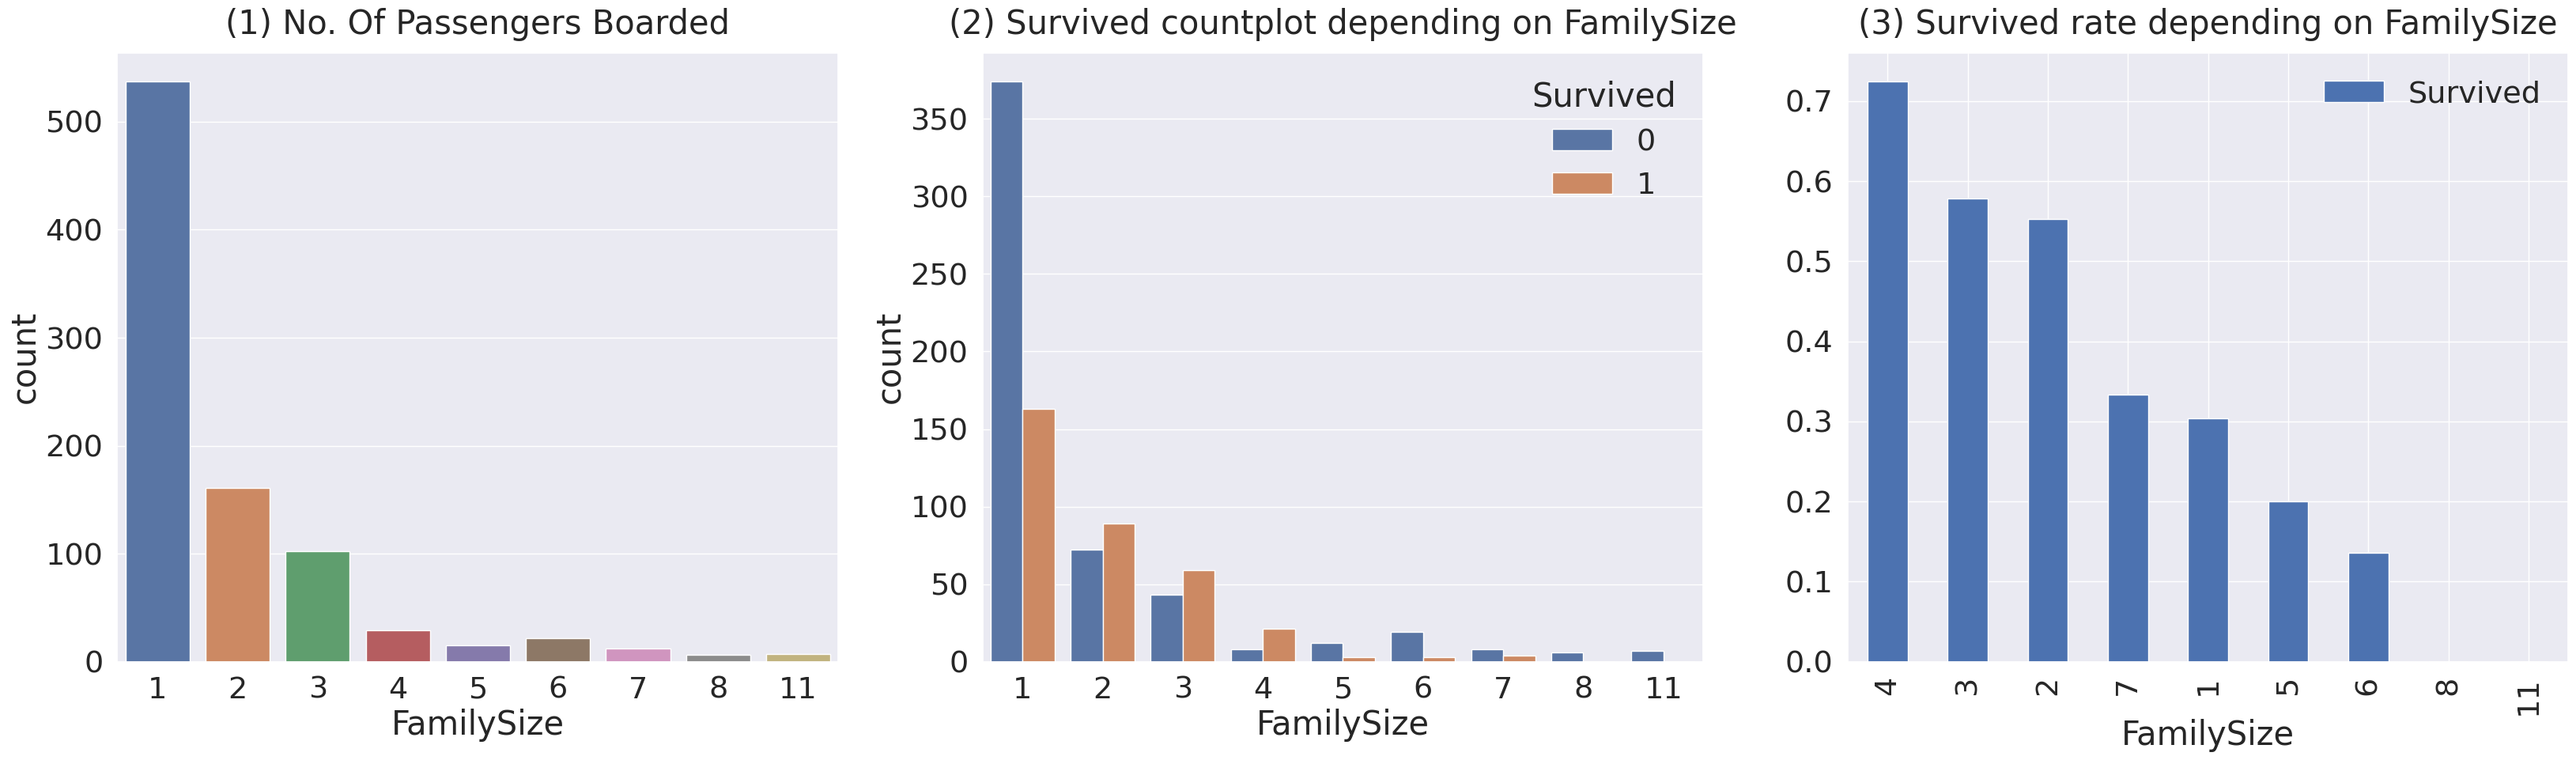

In [95]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x = 'FamilySize', data=train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x = 'FamilySize', hue = 'Survived', data=train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Ticket
===

In [97]:
train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64